In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
from pathlib import Path
%matplotlib inline
from PIL import Image
import os

from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score

(100, 100)


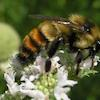

In [15]:
img = Image.open('dbs/bee_1.jpg')
print(img.size)
img

(100, 100, 3)


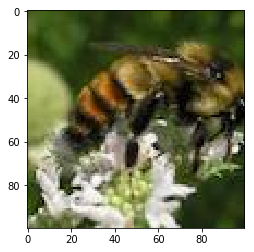

In [16]:
img_data = np.array(img)
img_data_shape = img_data.shape
print(img_data_shape)
plt.imshow(img_data)
plt.show()

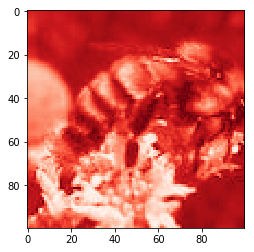

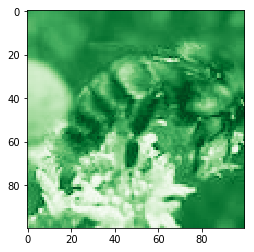

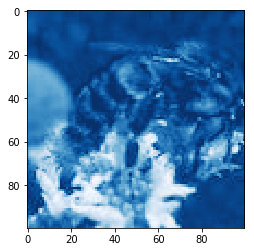

In [17]:
#Checking the RGB Channels

plt.imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
plt.show()
plt.imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
plt.show()
plt.imshow(img_data[:, :, 2], cmap=plt.cm.Blues_r)
plt.show()

In [18]:
def plot_kde(channel, color):
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)
channels = ['r','g','b']

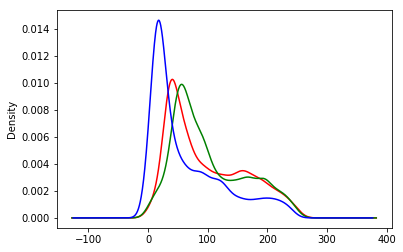

In [19]:
def plot_rgb(image_data):
    for ix, color in enumerate(channels):
        plot_kde(img_data[:, :, ix], color)
    plt.show()
    
plot_rgb(img_data)

In [20]:
#The above KDE shows that the colors to the right(green and red) appear most frequently 
#while those to the left(blue) appear least frequently.

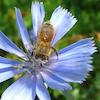

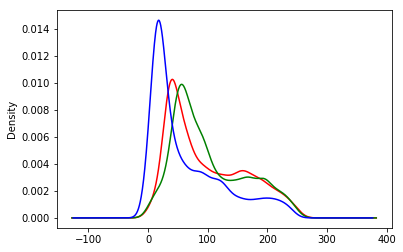

In [21]:
honey=Image.open('dbs/bee_12.jpg')
display(honey)
honey_data=np.array(honey)
plot_rgb(honey_data)

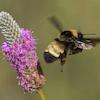

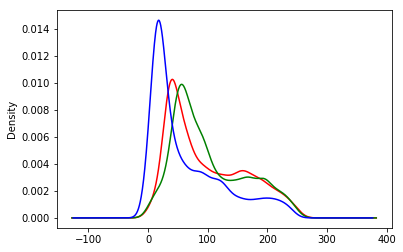

In [22]:
bumble = Image.open('dbs/bee_3.jpg')
display(bumble)
bumble_data = np.array(bumble)
plot_rgb(bumble_data)

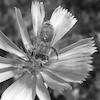

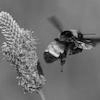

In [23]:
honey_bw = honey.convert('L')             #Converting to Black and white to remove influence by rest of colors in image
display(honey_bw)
bumble_bw = bumble.convert('L')
display(bumble_bw)

In [24]:
honey_bw_arr = np.array(honey_bw)
bumble_bw_arr = np.array(bumble_bw)

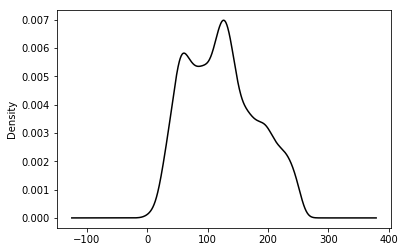

In [25]:
plot_kde(honey_bw_arr, 'k')

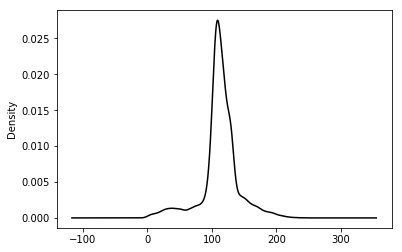

In [26]:
plot_kde(bumble_bw_arr, 'k')

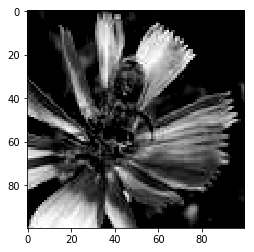

In [27]:
honey_hc_arr=np.maximum(honey_bw_arr,100)           #Increasing contrast
bumble_hc_arr=np.maximum(bumble_bw_arr,100)
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

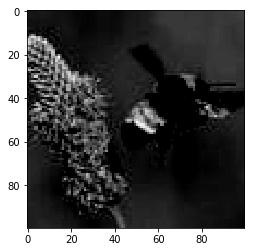

In [28]:
plt.imshow(bumble_hc_arr, cmap=plt.cm.gray)

In [29]:
honey_bw_hc = Image.fromarray(honey_hc_arr)

In [30]:
display(labels.head())

NameError: name 'labels' is not defined

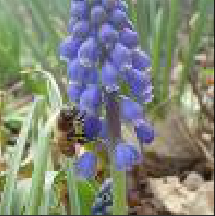

In [31]:
apis = Image.open('dbs/apis.jpg')
apis

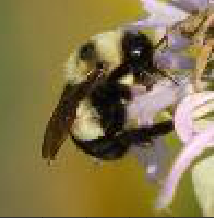

In [32]:
bombus = Image.open('dbs/bombus.jpg')
bombus

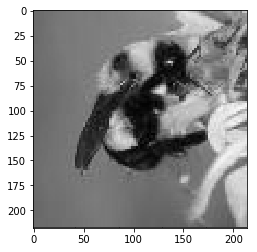

In [33]:
grey_apis = apis.convert('L')
grey_bombus = bombus.convert('L')
plt.imshow(grey_bombus, cmap=mpl.cm.gray)

In [34]:
#Using HOG (histogram of oriented gradients) here. 
#The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the 
#purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image. 
#This method is similar to that of edge orientation histograms, scale-invariant feature transform descriptors, and shape 
#contexts, but differs in that it is computed on a dense grid of uniformly spaced cells and uses overlapping local contrast 
#normalization for improved accuracy.

#The idea behind HOG is that an object's shape within an image can be inferred by its edges, and a way to identify edges 
#is by looking at the direction of intensity gradients

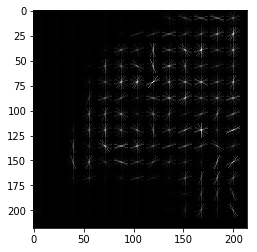

In [35]:
hog_features, hog_image = hog(grey_bombus, visualise=True, block_norm='L2-Hys',  pixels_per_cell=(16, 16))
plt.imshow(hog_image, cmap=mpl.cm.gray)

In [36]:
def create_features(img):    
    color_features = np.ndarray.flatten(img)
    grey_image = rgb2grey(img)
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    flat_features = np.hstack((color_features,hog_features))
    return flat_features

In [37]:
bombus_later = np.array(bombus)
bombus_features = create_features(bombus_later)

In [38]:
apis = Image.open('dbs/apis.jpg')
bee_1 = Image.open('dbs/bee_1.jpg')
bee_3 = Image.open('dbs/bee_3.jpg')
bee_12 = Image.open('dbs/bee_12.jpg')


In [39]:
apis_later = np.array(apis)
apis_features = create_features(apis_later)
bee_1_later = np.array(bee_1)
bee_1_features = create_features(bee_1_later)
bee_3_later = np.array(bee_3)
bee_3_features = create_features(bee_3_later)
bee_12_later = np.array(bee_12)
bee_12_features = create_features(bee_12_later)

In [40]:
features_list = []

In [41]:
features_list.append(bombus_features)
features_list.append(apis_features)
features_list.append(bee_1_features)
features_list.append(bee_3_features)
features_list.append(bee_12_features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bees_pca,labels.genus.values,test_size=.3,random_state=1234123)

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Model accuracy is: ', accuracy)

In [ ]:
probabilities = svm.predict_proba(X_test)
y_proba = probabilities[:, 1]
print(y_proba)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)


In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_plot = plt.plot(false_positive_rate,true_positive_rate,label='AUC = {:0.2f}'.format(roc_auc))

In [ ]:
plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate'); 

In [1]:
#Not able to print ROC Curve graph due to library import error

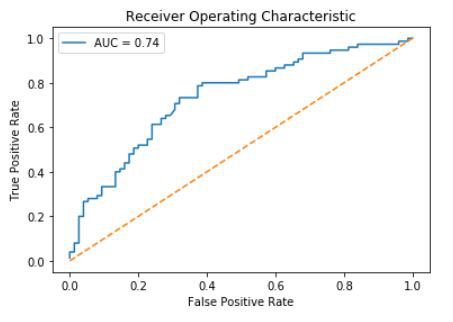

In [42]:
roc=Image.open('dbs/capture.jpg')
display(roc)